## Linear Regression using Gradient Descent

This Notebook is an illustraion of performing Linear Regression using Gradient Descent.
Also, I have used random values as the training set

In [7]:
import numpy as np
from sklearn import model_selection 

from gd_package import LinearRegression

In [8]:
def generate_random_samples(samples, features, add_x0 = True):
    X = np.random.rand(samples, features)
    y = np.random.rand(samples, 1)
    if (add_x0):
        X0 = np.ones((samples,1))
        X = np.concatenate((X0, X), axis = 1)
    return X, y

def generate_train_test_samples(X, y, test_size = 0.33):    
    return model_selection.train_test_split(X, y, test_size=test_size, random_state=42)

def gradient_descent(X_train, y_train, X_test, y_test, iterations = 200, alpha_lr = 0.02):
    theta = np.random.rand(X_train.shape[1], 1)
    m_samples = X_train.shape[0]
    
    linearRegObj = LinearRegression(m_samples)

    for i in range(0, iterations):
    
        y_train_pred = linearRegObj.get_predictions(X_train, theta)
        y_test_pred = linearRegObj.get_predictions(X_test, theta)
        
        #Evaluate Model
        linearRegObj.evaluate_model(y_train_pred, y_train, y_test_pred, y_test)
        
        #Update Gradients
        theta = linearRegObj.calculate_gradients(alpha_lr, theta, X_train, y_train_pred, y_train)
        
        #Calculate Cost
        linearRegObj.calculate_cost(y_train_pred, y_train)
    
    linearRegObj.display_metrics()
    
    return theta


Final Train RMSE : 0.3297317349047432
Final Test RMSE : 0.34108074294967616


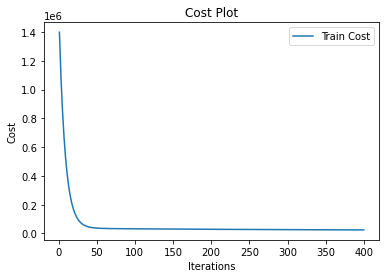

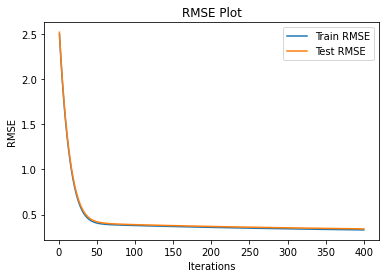

In [9]:
X, y = generate_random_samples(1000, 8)
X_train, X_test, y_train, y_test = generate_train_test_samples(X, y, test_size = 0.33)
theta = gradient_descent(X_train, y_train, X_test, y_test, iterations = 400, alpha_lr = 0.02)